In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2021-07-24 23:32:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   168MB/s    in 0.4s    

2021-07-24 23:32:24 (168 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
! unzip -q cats_and_dogs_filtered.zip

In [ ]:
train_dir = "cats_and_dogs_filtered/train"
validation_dir = "cats_and_dogs_filtered/validation"

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50

## Primero como siempre importamos los datos

In [ ]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Ahora importamos la red y los pesos de la red VGG16

In [ ]:

vgg_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## Setear los parámetros del modelo base a no entrenable

In [ ]:
vgg_base.trainable=False 

### Ahora hay que agregar las últimas capas de la red:

In [ ]:


model = models.Sequential()
model.add(vgg_base)
# agregar el final de la red
# una capa flatten
# una capa densa de 256 elementos
# una capa sigmoidea
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Entrenamos el modelo

In [ ]:


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 23s 230ms/step - loss: 0.3993 - acc: 0.8240 - val_loss: 0.3309 - val_acc: 0.8540
Epoch 2/10
100/100 [==============================] - 23s 226ms/step - loss: 0.3841 - acc: 0.8300 - val_loss: 0.3229 - val_acc: 0.8550
Epoch 3/10
100/100 [==============================] - 23s 226ms/step - loss: 0.3685 - acc: 0.8315 - val_loss: 0.3116 - val_acc: 0.8600
Epoch 4/10
100/100 [==============================] - 23s 225ms/step - loss: 0.3580 - acc: 0.8450 - val_loss: 0.2849 - val_acc: 0.8740
Epoch 5/10
100/100 [==============================] - 22s 224ms/step - loss: 0.3497 - acc: 0.8435 - val_loss: 0.2806 - val_acc: 0.8730
Epoch 6/10
100/100 [==============================] - 22s 223ms/step - loss: 0.3429 - acc: 0.8385 - val_loss: 0.2751 - val_acc: 0.8800
Epoch 7/10
100/100 [==============================] - 22s 224ms/step - loss: 0.3373 - acc: 0.8595 - val_loss: 0.2753 - val_acc: 0.8780
Epoch 8/10
100/100 [==============================] - 2

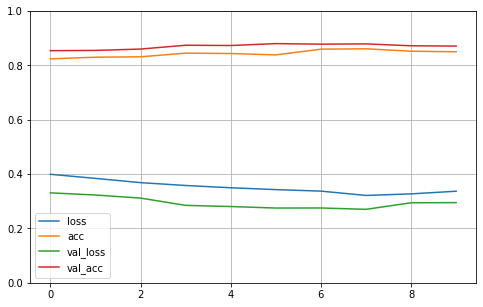

In [ ]:



pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# TAREA: Hacer lo mismo con ResNet50:

In [ ]:

base_resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(150, 150, 3)
)

### COMPLETAR
base_resnet.trainable = False
#base_resnet.summary()

Agrego las capas de clasificacion:


In [ ]:
#replicamos la estructura de capas densas utilizada con VGG16

model = models.Sequential()
model.add(base_resnet)
# agregar el final de la red
# una capa flatten
# una capa densa de 256 elementos
# una capa sigmoidea
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

Reconfiguramos los data generators

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255
      #rotation_range=40,
      #width_shift_range=0.2,
      #height_shift_range=0.2,
      #shear_range=0.2,
      #zoom_range=0.2,
      #horizontal_flip=True
      )

test_datagen = ImageDataGenerator(
    rescale=1.0/255
    )

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Entrenamos resnet

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 13s 99ms/step - loss: 0.6981 - acc: 0.5425 - val_loss: 0.6708 - val_acc: 0.5838
Epoch 2/100
100/100 [==============================] - 9s 89ms/step - loss: 0.6706 - acc: 0.5825 - val_loss: 0.6669 - val_acc: 0.5913
Epoch 3/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6531 - acc: 0.6125 - val_loss: 0.6470 - val_acc: 0.6325
Epoch 4/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6498 - acc: 0.6212 - val_loss: 0.6512 - val_acc: 0.5987
Epoch 5/100
100/100 [==============================] - 9s 88ms/step - loss: 0.6438 - acc: 0.6212 - val_loss: 0.6275 - val_acc: 0.6700
Epoch 6/100
100/100 [==============================] - 9s 87ms/step - loss: 0.6368 - acc: 0.6288 - val_loss: 0.6603 - val_acc: 0.5962
Epoch 7/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6254 - acc: 0.6594 - val_loss: 0.6297 - val_acc: 0.6325
Epoch 8/100
100/100 [==============================] - 8s 83m

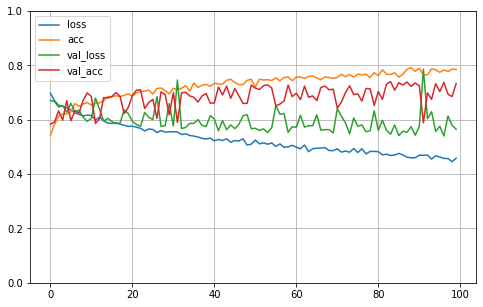

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()